In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas_profiling
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX








c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Adhersh A\AppData\Local\Temp\ipykernel_28128\3017853901.py:15: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
df=pd.read_excel("Gold_details.xlsx")

In [3]:
df.head()

,Date,Price of gold,Exchange rate,Crude Oil Price(INR),Inflation Rate,S&P Index Fund
0,2013-01-01,3092.79,54.83,5032.88,11.62,1462.420044
1,2013-01-02,3105.15,54.39,5067.51,11.62,1462.420044
2,2013-01-03,3109.68,54.42,5073.36,11.62,1459.369995
3,2013-01-04,3078.01,54.85,5090.53,11.62,1466.469971
4,2013-01-05,3096.79,54.85,5129.82,11.62,1461.890015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4455 non-null   datetime64[ns]
 1   Price of gold         4455 non-null   float64       
 2   Exchange rate         4455 non-null   float64       
 3   Crude Oil Price(INR)  4455 non-null   float64       
 4   Inflation Rate        4455 non-null   float64       
 5   S&P Index Fund        4455 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 209.0 KB


In [5]:
duplicate_dates = df[df.duplicated(subset='Date', keep=False)]
duplicate_dates

,Date,Price of gold,Exchange rate,Crude Oil Price(INR),Inflation Rate,S&P Index Fund
1267,2017-10-17,2968.33,64.92,3367.09,3.24,2559.360107
1268,2017-10-17,2986.93,64.92,3367.09,3.24,2559.360107
1269,2017-10-18,2959.11,65.06,3392.40,3.24,2561.260010
1270,2017-10-18,2994.80,65.06,3392.40,3.24,2561.260010
1271,2017-10-19,2994.10,65.06,3355.85,3.24,2562.100098
...,...,...,...,...,...,...
4450,2023-12-27,6323.05,83.32,6250.18,5.69,4781.580078
4451,2023-12-28,6356.20,83.23,6115.05,5.69,4783.350098
4452,2023-12-28,6316.64,83.23,6115.05,5.69,4783.350098
4453,2023-12-29,6323.79,83.12,6200.34,5.69,4769.830078


In [6]:
df = df.drop_duplicates(subset='Date', keep='first')


In [7]:
df.set_index("Date",inplace=True)

In [8]:
df.describe()

,Price of gold,Exchange rate,Crude Oil Price(INR),Inflation Rate,S&P Index Fund
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,3747.272954,68.057078,4697.283558,5.995009,2867.842757
std,1121.060224,6.880308,1583.288449,2.236899,950.878543
min,2458.240000,52.970000,957.230000,1.080000,1457.150024
25%,2874.510000,64.000000,3310.670000,4.870000,2063.949951
50%,3112.260000,68.490000,4394.030000,5.640000,2695.949951
75%,4829.160000,69.050000,6019.870000,6.750000,3803.790039
max,6356.200000,83.400000,9533.480000,12.060000,4796.560059


Gold Price:
Average: ₹ 4008.61
Range: ₹ 2458.24 - ₹ 6356.20
Volatility: High (Std: ₹ 1140.04)

  Exchange Rate:
Average: ₹ 69.50
Range: ₹ 52.97 - ₹ 83.40
Stability: Moderate (Std: ₹ 6.87)

  Crude Oil Price:
Average: ₹ 4829.53
Range: ₹ 957.23 - ₹ 9533.48
Volatility: High (Std: ₹ 1604.43)

  Inflation Rate:
Average: 5.89%
Range: 1.08% - 12.06%
Volatility: Moderate (Std: 1.95)

  S&P Index Fund:
Average: ₹ 3115.02
Range: ₹ 1457.15 - ₹ 4796.56
Volatility: High (Std: ₹ 930.65)

Key Observations:
Gold: Significant volatility with a broad price range.

Exchange Rate: Relatively stable with minor fluctuations.

Crude Oil: Substantial volatility influenced by global factors.

Inflation: Fluctuations indicate changing economic conditions.

S&P Index Fund: Market fluctuations reflecting economic environment changes.

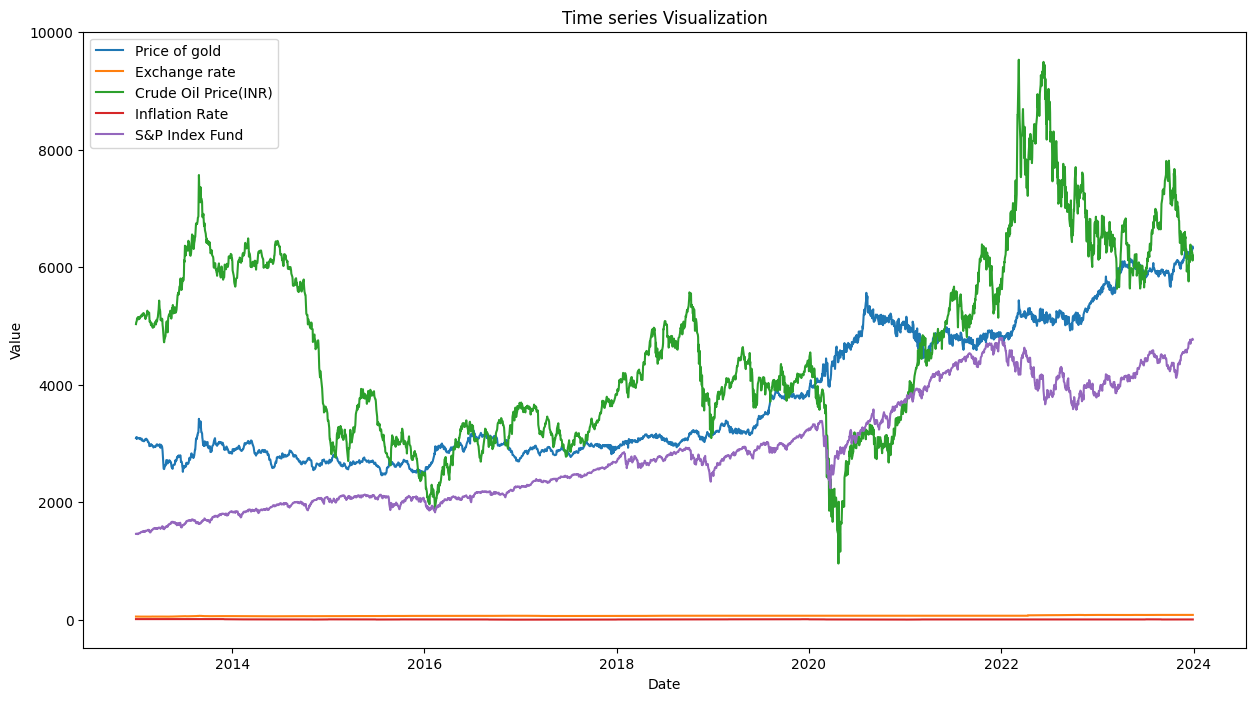

In [9]:
plt.figure(figsize=(15,8))
for column in df.columns:
    plt.plot(df.index,df[column],label=column)
plt.title("Time series Visualization")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

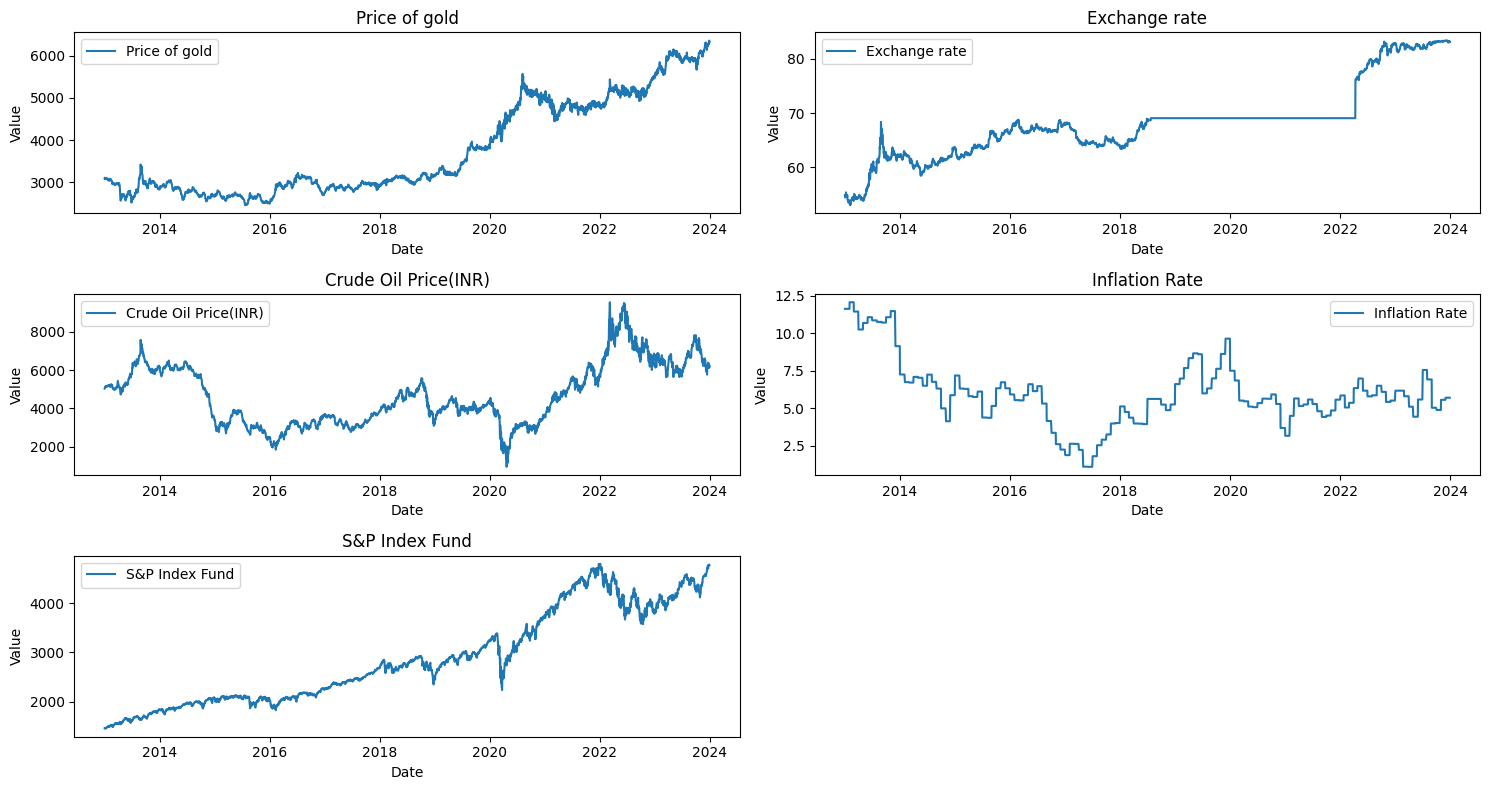

In [10]:
# Get the number of columns in the DataFrame
num_cols = len(df.columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 1) // 2  # You can adjust this based on your preference
num_cols_subplot = 2

# Create subplots
fig,axs= plt.subplots(num_rows,num_cols_subplot,figsize=((15,8)))
# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each column and plot on a separate subplot
for i, column in enumerate(df.columns):
    axs[i].plot(df.index, df[column], label=column)
    axs[i].set_title(column)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Value")
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

We could see high volatility in the gold prices as well as the crude oil , but we could see that both gold price and s&p index price are rising and have a pattern , since the value of these are high comparing to inflation rate and exchange rate we cant find any relation from this graph for that we have to further do.

Lets try scaling these and doing once again



In [11]:
scaler = MinMaxScaler()

scaled_data= scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data,columns=df.columns,index=df.index)



In [12]:
scaled_df.describe()


,Price of gold,Exchange rate,Crude Oil Price(INR),Inflation Rate,S&P Index Fund
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,0.330694,0.495796,0.436094,0.447633,0.422438
std,0.287602,0.226103,0.184613,0.203725,0.284744
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.106792,0.362471,0.274414,0.345173,0.181709
50%,0.167785,0.510023,0.400735,0.415301,0.370964
75%,0.608246,0.528426,0.590309,0.516393,0.702711
max,1.000000,1.000000,1.000000,1.000000,1.000000


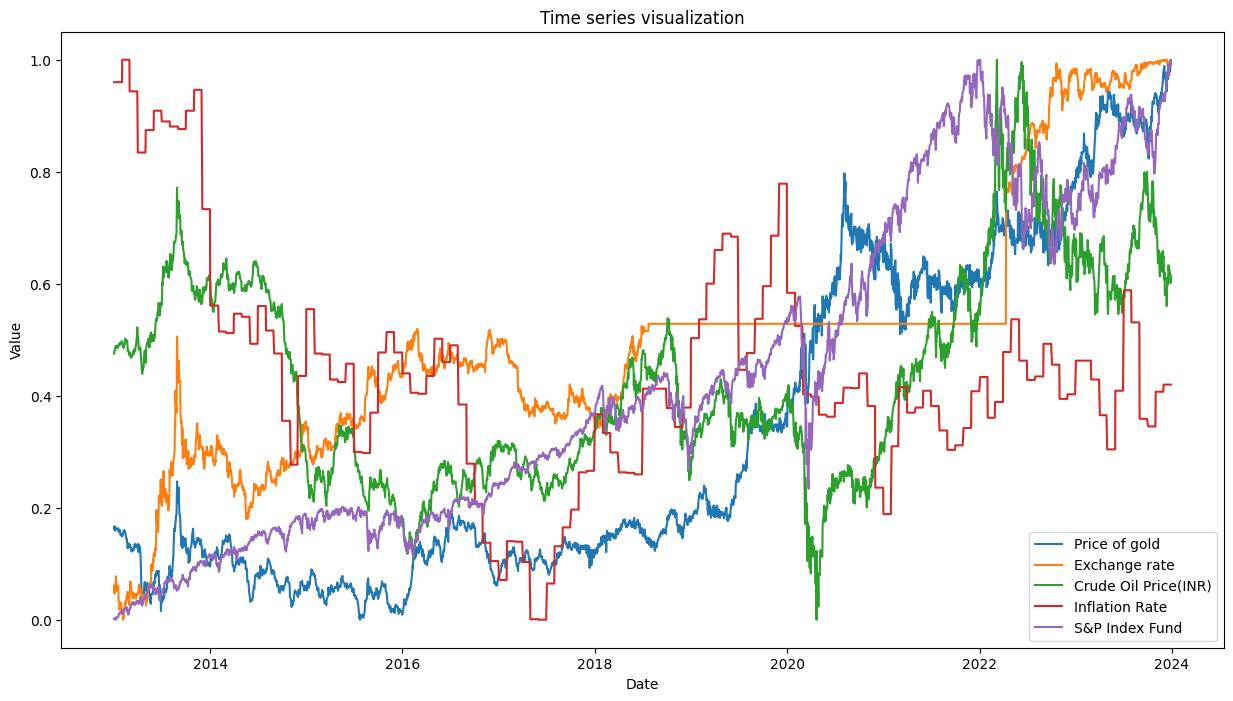

In [13]:
plt.figure(figsize=(15,8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index,scaled_df[column],label=column)
plt.title("Time series visualization")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

this gives us a better picture of how the prices are changing we could a lot of correlation between the prices , but to make this much better to intepret lets see each different graphs

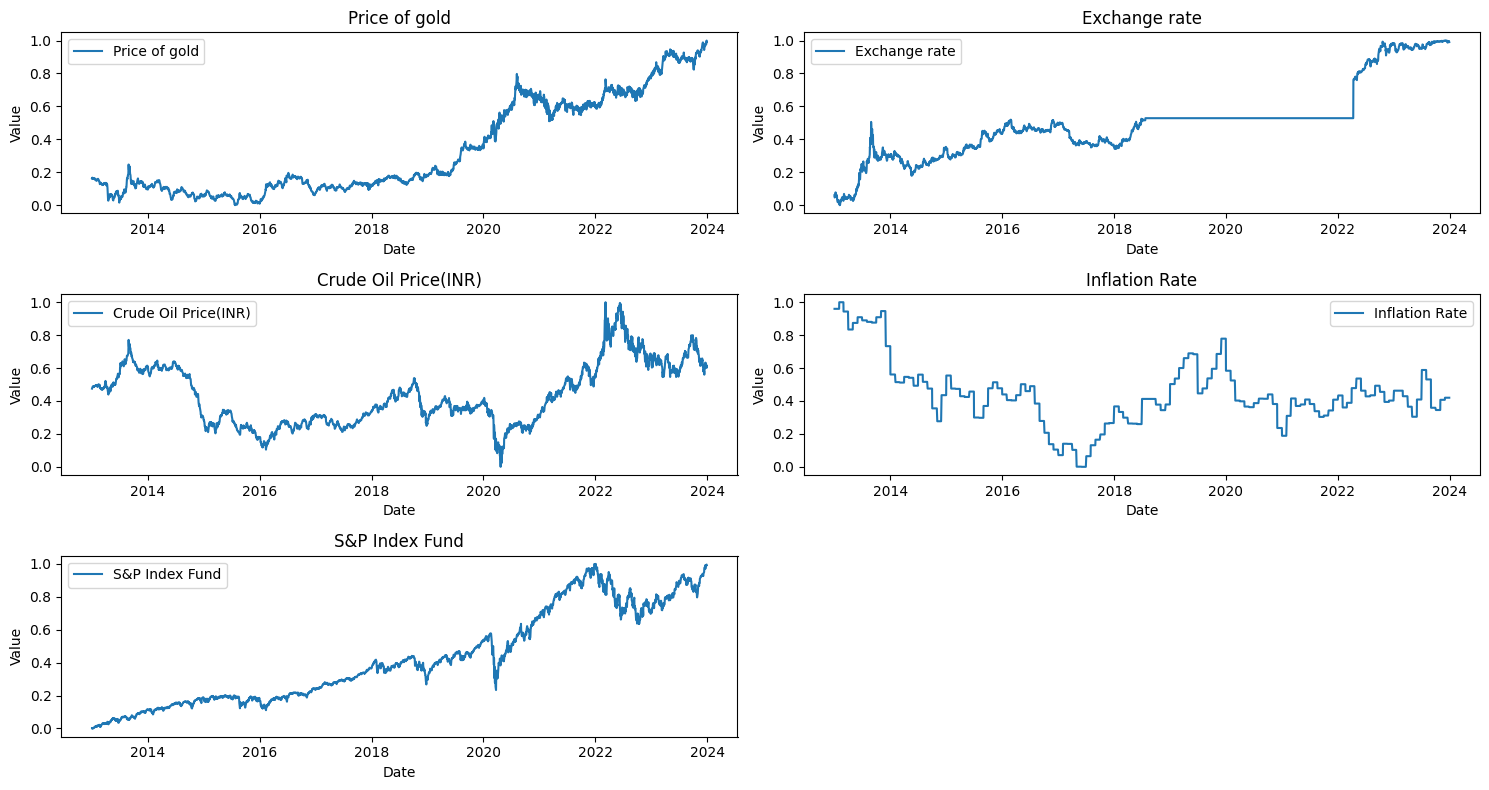

In [14]:
# Get the number of columns in the DataFrame
num_cols = len(scaled_df.columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 1) // 2  # You can adjust this based on your preference
num_cols_subplot = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols_subplot, figsize=(15, 8))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over each column and plot on a separate subplot
for i, column in enumerate(scaled_df.columns):
    axs[i].plot(scaled_df.index, scaled_df[column], label=column)
    axs[i].set_title(column)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Value")
    axs[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

lets find a correlation  matrix to undestand more about the raltion between each

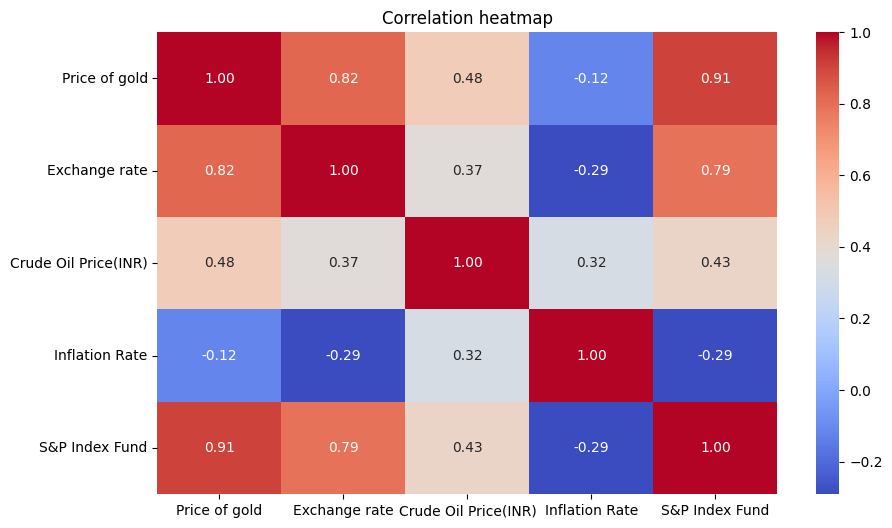

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(scaled_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation heatmap")
plt.show()


Strong Positive Correlations: 
   Price of gold and S&P Index Fund (0.896),
  Exchange rate and Price of gold (0.820)

Moderate Positive Correlations:
  Exchange rate and S&P Index Fund (0.755),
  Crude Oil Price(INR) and Price of gold (0.502)

Weak Positive Correlations:
  Crude Oil Price(INR) and Exchange rate (0.485),
  Crude Oil Price(INR) and S&P Index Fund (0.500)

Weak Negative Correlations:
  Exchange rate and Inflation Rate (-0.209),
  Inflation Rate and S&P Index Fund (-0.260)

Gold price and S&P Index Fund move together strongly.

Exchange rate influences gold price and S&P Index Fund positively.

Crude oil price has a moderate positive relationship with gold price.

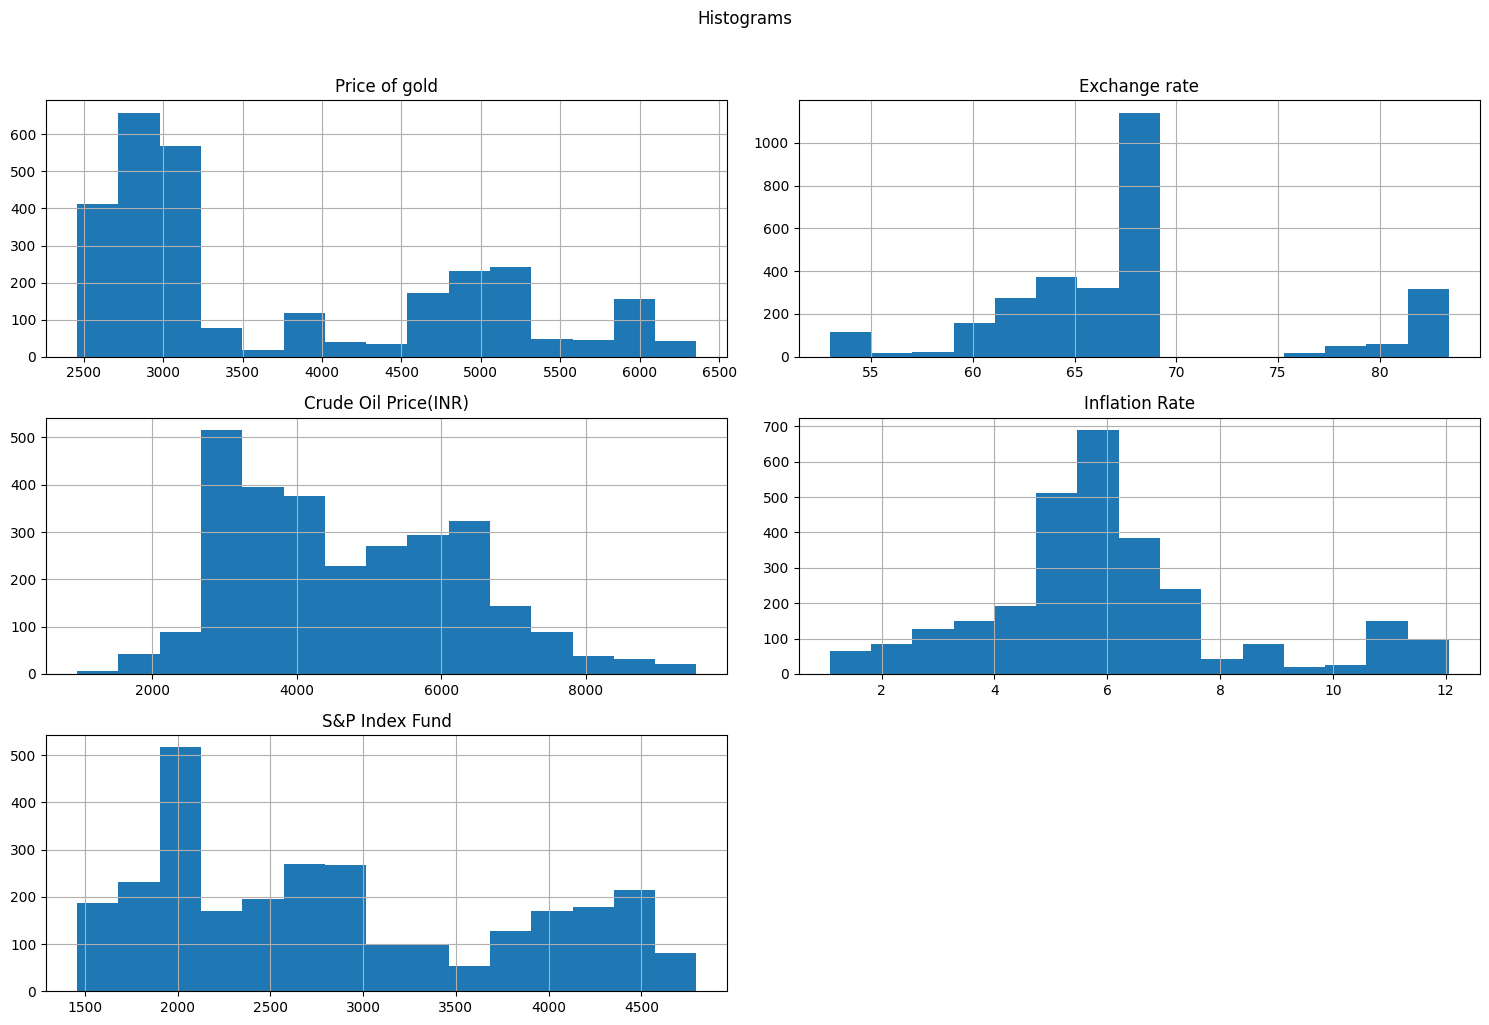

In [16]:
df.hist(figsize=(15, 10), bins=15)
plt.suptitle('Histograms', y=1.02)
plt.tight_layout()
plt.show()

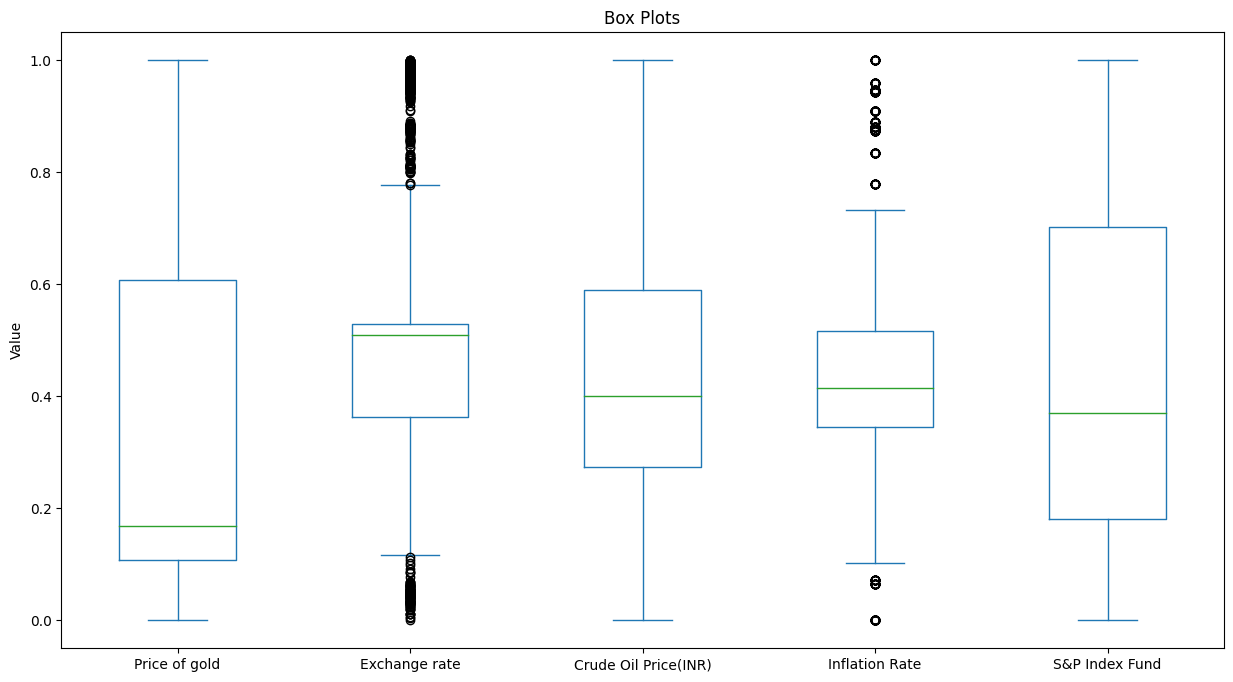

In [17]:
scaled_df.plot(kind='box', figsize=(15, 8))
plt.title('Box Plots')
plt.ylabel('Value')
plt.show()

now lets Decompose the time series data into trend, seasonal, and residual components to identify underlying patterns and seasonality.for that lets first find the monthly average and then proceed



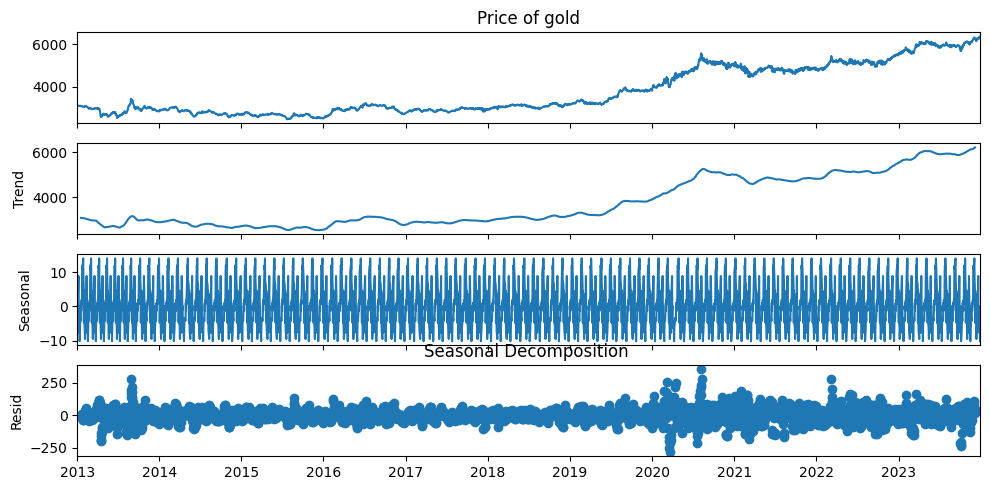

In [19]:
plt.rcParams['figure.figsize'] = 10,5

# Perform seasonal decomposition for each variable in df_monthly_avg

result = seasonal_decompose(df["Price of gold"].dropna(), model='additive',period=30)
result.plot()
plt.title('Seasonal Decomposition ')
plt.show()

Rolling Stats

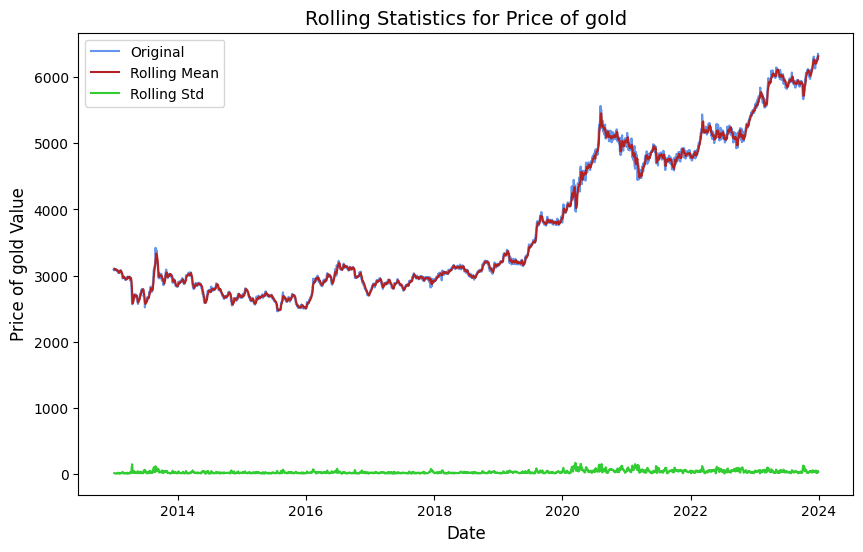

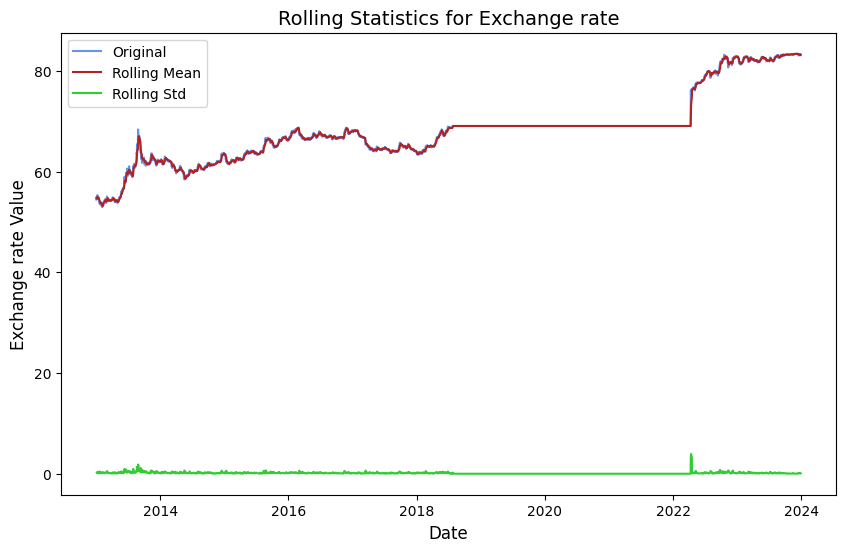

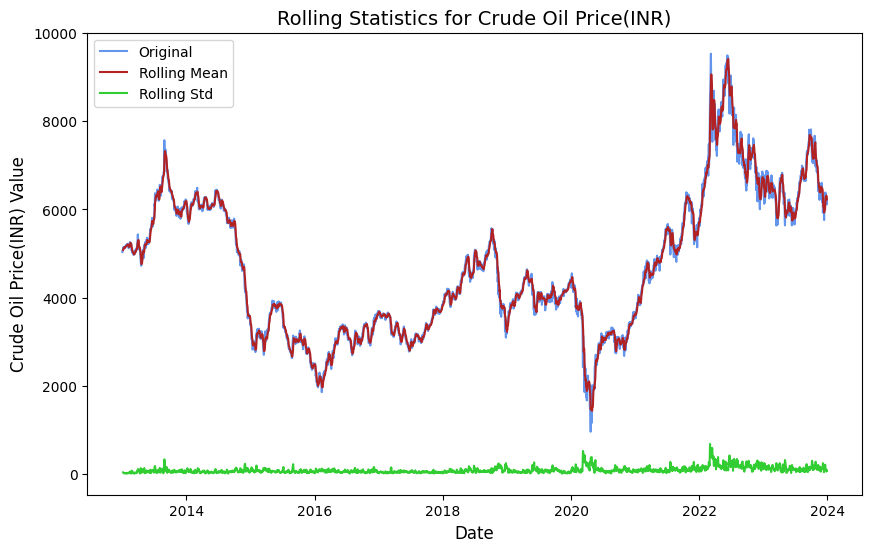

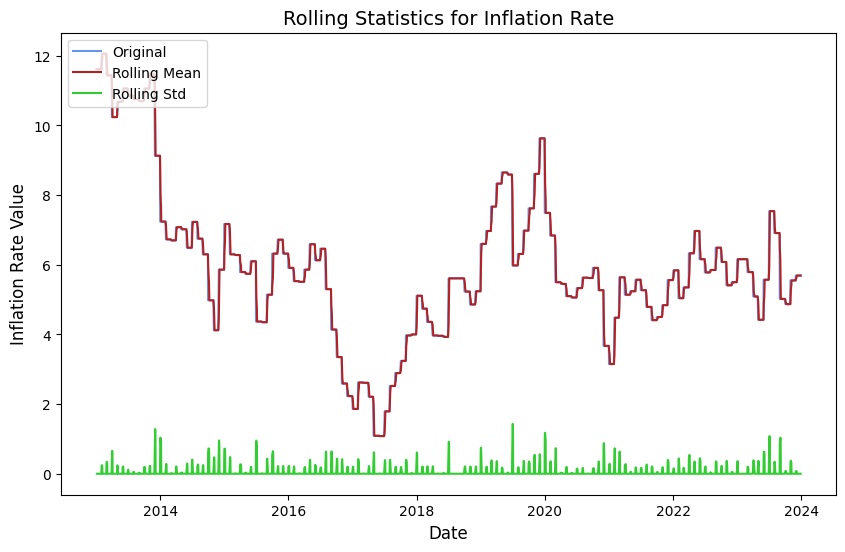

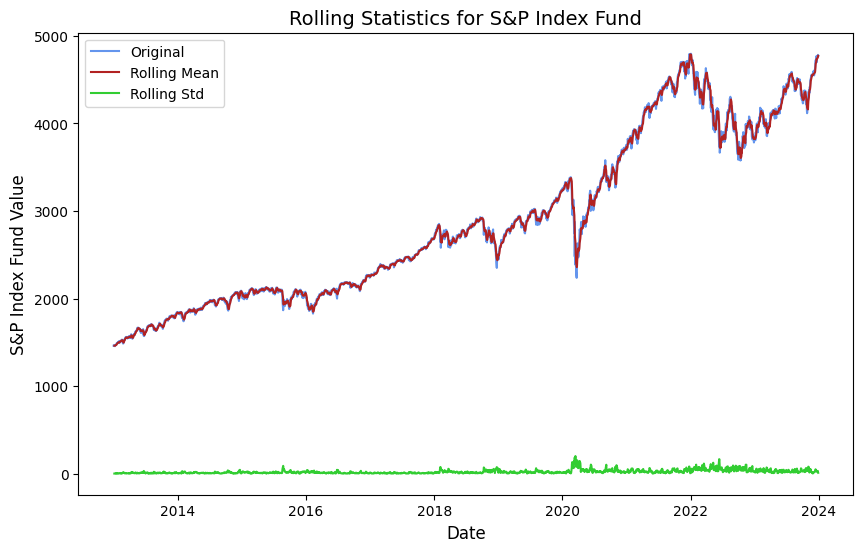

In [20]:
rolling_mean = df.rolling(window=5).mean()
rolling_std = df.rolling(window=5).std()

# Plot each column separately
for column in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column], color='cornflowerblue', label='Original')
    plt.plot(rolling_mean.index, rolling_mean[column], color='firebrick', label='Rolling Mean')
    plt.plot(rolling_std.index, rolling_std[column], color='limegreen', label='Rolling Std')
    
    # Add labels and title
    plt.xlabel('Date', size=12)
    plt.ylabel(f'{column} Value', size=12)
    plt.legend(loc='upper left')
    plt.title(f'Rolling Statistics for {column}', size=14)
    
    # Display the plot
    plt.show()

ADF test

In [21]:
def adf_test(data_column):

    # Perform ADF test
    result = adfuller(data_column)
    
    # Print the results
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    
    # Interpretation
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [22]:
    print(f"--- ADF Test Results for {column} ---")
    adf_test(df['Price of gold'])
    print("\n")

--- ADF Test Results for S&P Index Fund ---
ADF Statistics: 0.9776157492477705
p-value: 0.9940240631043429
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.




Non-Stationary: All the columns ('Price of Gold', 'Exchange Rate', 'Crude Oil Price (INR)', 'Inflation Rate', 'S&P Index Fund') are likely non-stationary based on the ADF test results, except for the 'Inflation Rate', which is close to stationary at the 10% significance level.

Now lets try to make it stationary by differencing

In [23]:
    df['Price of gold First Difference'] = df['Price of gold'] - df['Price of gold'].shift(1)


In [24]:
df.columns

Index(['Price of gold', 'Exchange rate', 'Crude Oil Price(INR)',
       'Inflation Rate', 'S&P Index Fund', 'Price of gold First Difference'],
      dtype='object')

In [25]:
columns_to_check = ['Price of gold First Difference']

for column in columns_to_check:
    print(f"--- ADF Test Results for {column} ---")
    
    # Drop rows with missing values
    series_to_test = df[column].dropna()
    
    # Perform the ADF test
    adf_test(series_to_test)
    print("\n")

--- ADF Test Results for Price of gold First Difference ---
ADF Statistics: -23.10992695440833
p-value: 0.0
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.




After applying the first difference to the 'Price of gold', 'Exchange rate', 'Crude Oil Price(INR)', 'Inflation Rate', and 'S&P Index Fund' time series data, the Augmented Dickey-Fuller (ADF) test results indicate that all the first difference series are stationary. The strong evidence against the null hypothesis and the p-values well below the significance level of 0.05 confirm the absence of a unit root, validating the stationarity of the data. This stationary transformation prepares the data for further time series analysis and modeling.

first difference decomposition to make non stationary data to stationary


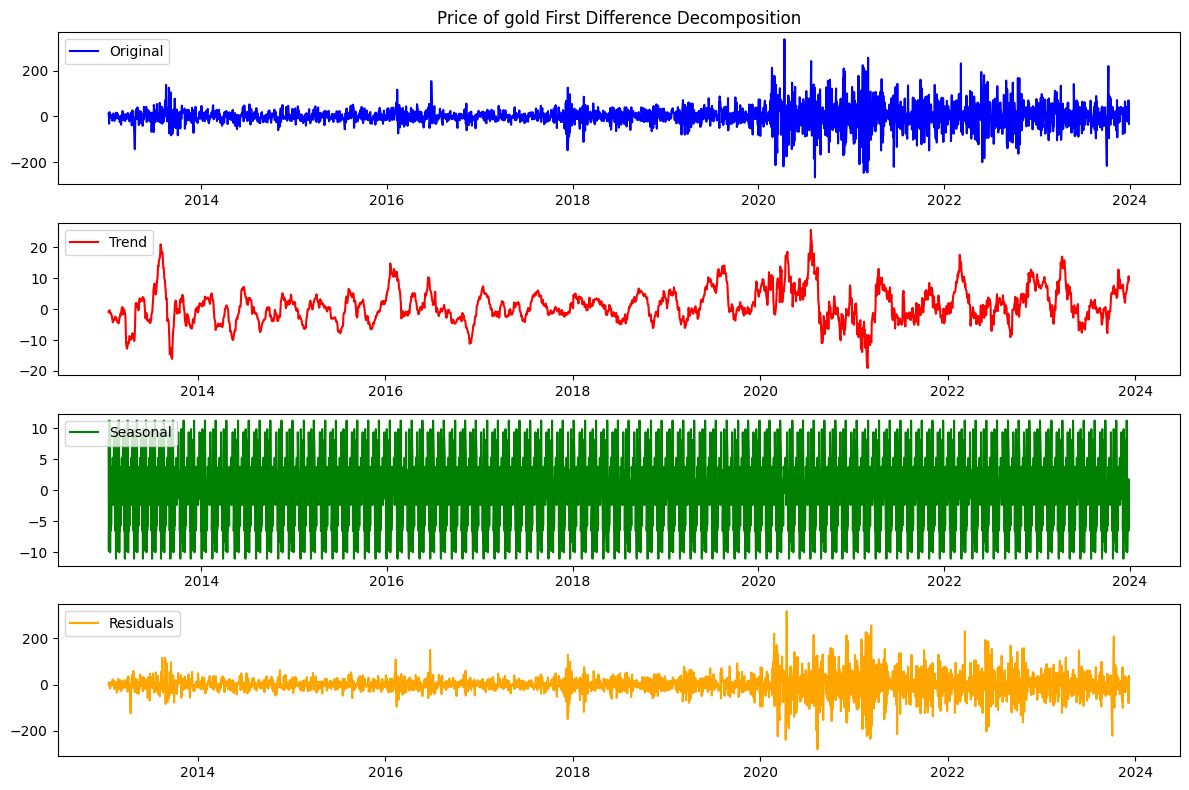

In [26]:
columns_to_decompose = ['Price of gold First Difference']

# Perform decomposition and plot the components
for column in columns_to_decompose:
    decomposition = seasonal_decompose(df[column].dropna(), model='additive',period=30)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(df[column], label='Original', color='blue')
    plt.title(f'{column} Decomposition')
    plt.legend(loc='upper left')
    
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='upper left')
    
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal', color='green')
    plt.legend(loc='upper left')
    
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='orange')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

Lag Analysis

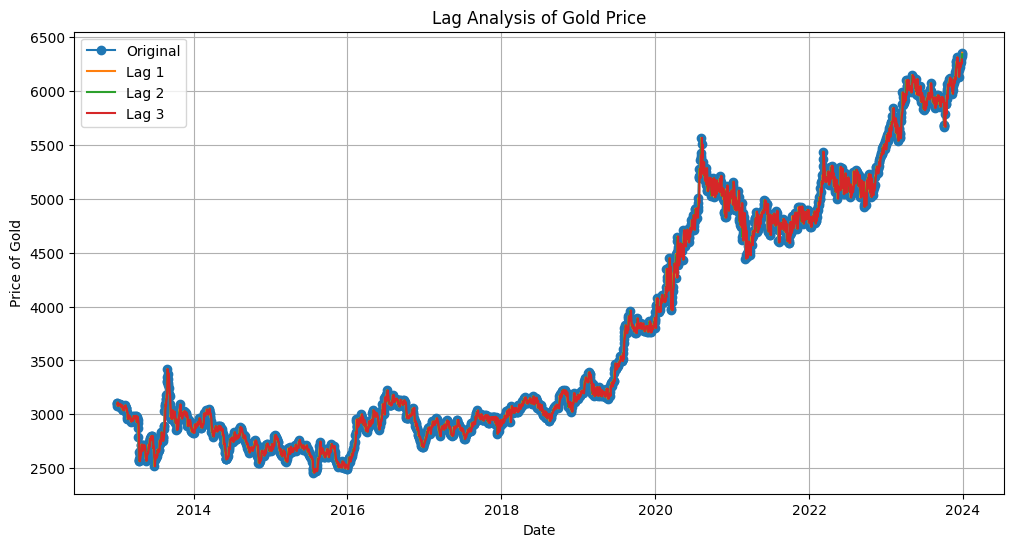

In [27]:
lags = range(1, 4)  # consider lags of 1 to 3 months
for lag in lags:
    df[f'Price of gold_lag{lag}'] = df['Price of gold'].shift(lag)

# Plot original data and lagged values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price of gold'], label='Original', marker='o')
for lag in lags:
    plt.plot(df.index, df[f'Price of gold_lag{lag}'], label=f'Lag {lag}')

plt.title('Lag Analysis of Gold Price')
plt.xlabel('Date')
plt.ylabel('Price of Gold')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

1. Autocorrelation:
The strong similarity between the lagged values and the original gold prices suggests a high degree of autocorrelation. This implies that past gold prices serve as reliable indicators for predicting future prices. The historical trends and patterns in gold prices seem to persist over time, offering valuable insights for forecasting future price movements.

2. Lead or Lag:
The plot helps to determine the relationship between changes in gold prices and their timing. If the lagged values closely track the original data, it indicates that changes in gold prices tend to follow the current values with a certain time delay. 

3. Seasonality:
The presence of periodic patterns in the lagged values suggests the existence of seasonality in gold prices. Seasonality refers to recurring patterns or cycles that occur at regular intervals, such as daily, weekly, or monthly. 

<Figure size 1200x600 with 0 Axes>

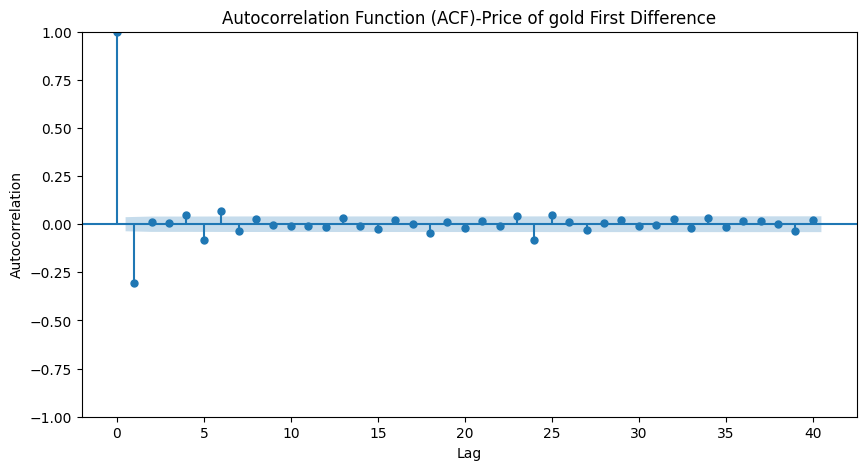

In [28]:
acf_column = ['Price of gold First Difference']
for column in acf_column:
        series=df[column].dropna()
        # Plot ACF
        plt.figure(figsize=(12, 6))
        plot_acf(series, lags=40, title=f'Autocorrelation Function (ACF)-{column}')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.show()

<Figure size 1200x600 with 0 Axes>

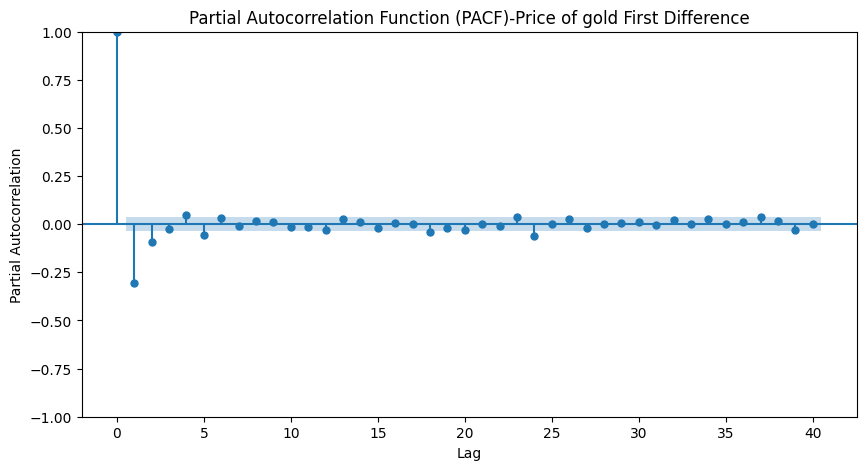

In [29]:
acf_column = ['Price of gold First Difference']
for column in acf_column:
        series=df[column].dropna()
        # Plot ACF
        plt.figure(figsize=(12, 6))
        plot_pacf(series, lags=40, title=f'Partial Autocorrelation Function (PACF)-{column}')
        plt.xlabel('Lag')
        plt.ylabel('Partial Autocorrelation')
        plt.show()

In [30]:
train_size = int(len(df) * 0.8)  # 80% training data
train, test = df[:train_size], df[train_size:]


c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Price of gold   No. Observations:                 2288
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -11721.707
Date:                Tue, 23 Apr 2024   AIC                          23457.413
Time:                        10:21:58   BIC                          23497.555
Sample:                             0   HQIC                         23472.053
                               - 2288                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6102      0.011   -142.254      0.000      -1.632      -1.588
ar.L2         -0.9350      0.011    -84.624      0.000      -0.957      -0.913
ma.L1          0.3342      0.015     22.246      0.0

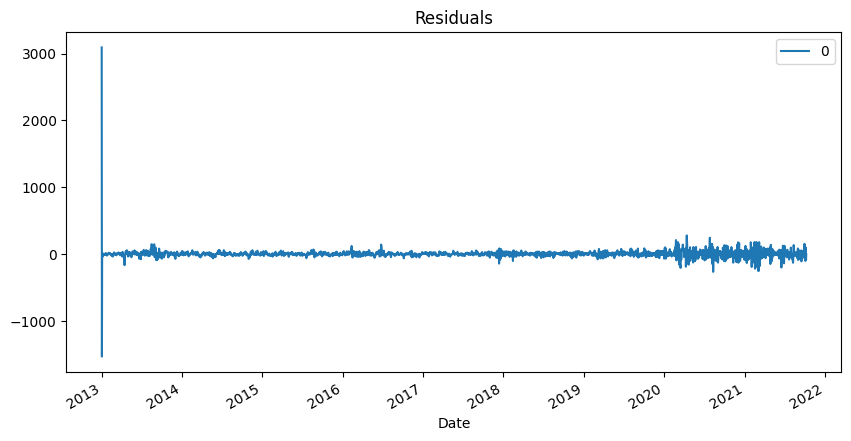

c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:

# Fit ARIMA model
model = ARIMA(train['Price of gold'], order=(2,2,4))  # (p, d, q) parameters
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

# Forecast
forecast = model_fit.forecast(steps=len(test))  # forecasting based on test set



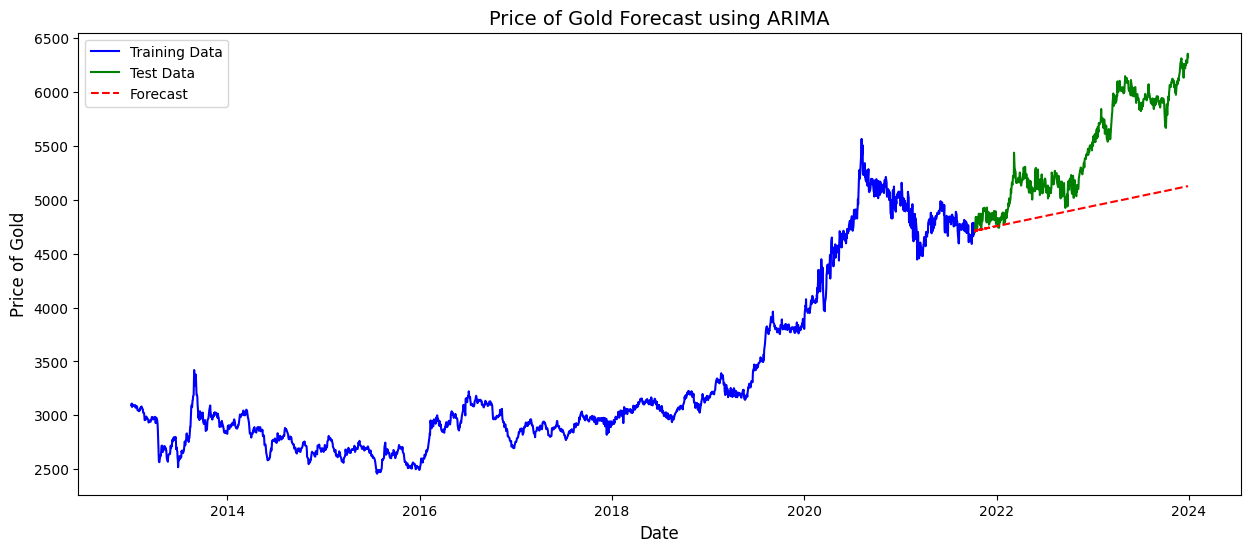

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(train.index, train['Price of gold'], label='Training Data', color='blue')
plt.plot(test.index, test['Price of gold'], label='Test Data', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Price of Gold Forecast using ARIMA', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price of Gold', fontsize=12)
plt.legend()
plt.show()

In [33]:
actual_values = test['Price of gold'].values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast)

# Calculate R-squared
def calculate_r_squared(actual, predicted):
    sse = np.sum((actual - predicted) ** 2)
    sst = np.sum((actual - np.mean(actual)) ** 2)
    r_squared = 1 - (sse / sst)
    return r_squared

# Calculate R-squared
r_squared = calculate_r_squared(actual_values, forecast)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: -0.9241959954721197
Mean Squared Error (MSE): 416471.38776028896
Root Mean Squared Error (RMSE): 645.3459442502826
Mean Absolute Error (MAE): 539.0382982263889


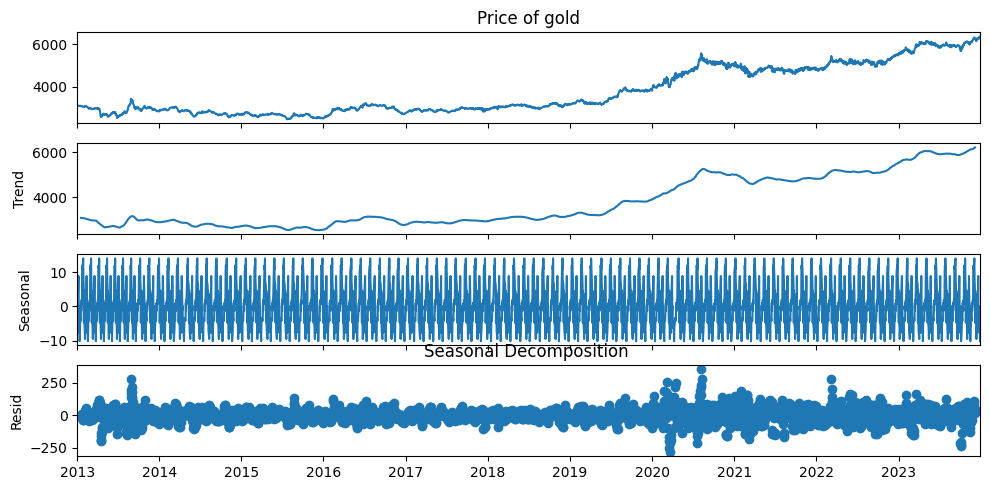

In [34]:
plt.rcParams['figure.figsize'] = 10, 5

# Perform seasonal decomposition for each variable in df_monthly_avg

result = seasonal_decompose(df["Price of gold"].dropna(), model='additive', period=30)
result.plot()
plt.title(f'Seasonal Decomposition ')
plt.show()

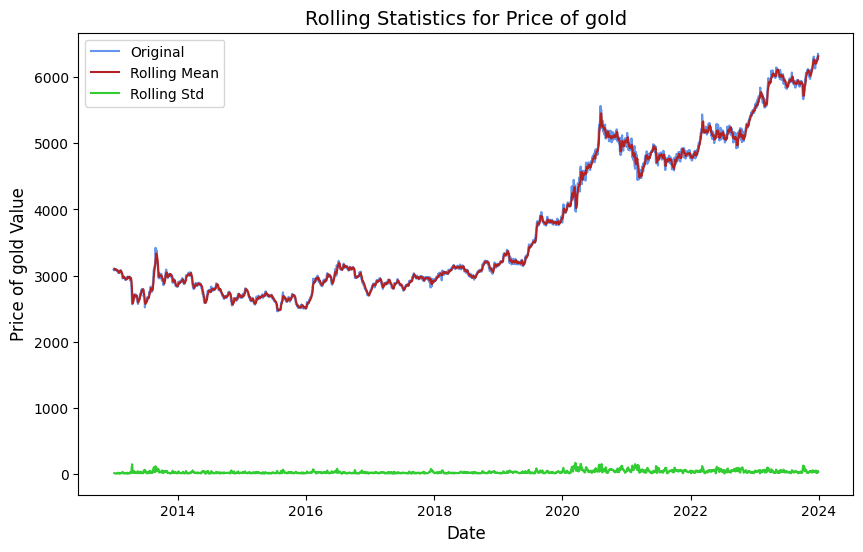

In [35]:
rolling_mean = df.rolling(window=5).mean()
rolling_std = df.rolling(window=5).std()

# Plot each column separately
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Price of gold"], color='cornflowerblue', label='Original')
plt.plot(rolling_mean.index, rolling_mean["Price of gold"], color='firebrick', label='Rolling Mean')
plt.plot(rolling_std.index, rolling_std["Price of gold"], color='limegreen', label='Rolling Std')

    # Add labels and title
plt.xlabel('Date', size=12)
plt.ylabel(f'{"Price of gold"} Value', size=12)
plt.legend(loc='upper left')
plt.title(f'Rolling Statistics for {"Price of gold"}', size=14)
    
    # Display the plot
plt.show()

In [36]:
def adf_test(data_column):

    # Perform ADF test
    result = adfuller(data_column)
    
    # Print the results
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    
    # Interpretation
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [37]:
print(f"--- ADF Test Results for---")
adf_test(df["Price of gold"])
print("\n")

--- ADF Test Results for---
ADF Statistics: 0.9776157492477705
p-value: 0.9940240631043429
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.




In [38]:

df['First Difference'] = df['Price of gold'] - df['Price of gold'].shift(1)


In [39]:
columns_to_check = ['First Difference']

for column in columns_to_check:
    print(f"--- ADF Test Results for {column} ---")
    
    # Drop rows with missing values
    series_to_test = df[column].dropna()
    
    # Perform the ADF test
    adf_test(series_to_test)
    print("\n")

--- ADF Test Results for First Difference ---
ADF Statistics: -23.10992695440833
p-value: 0.0
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.




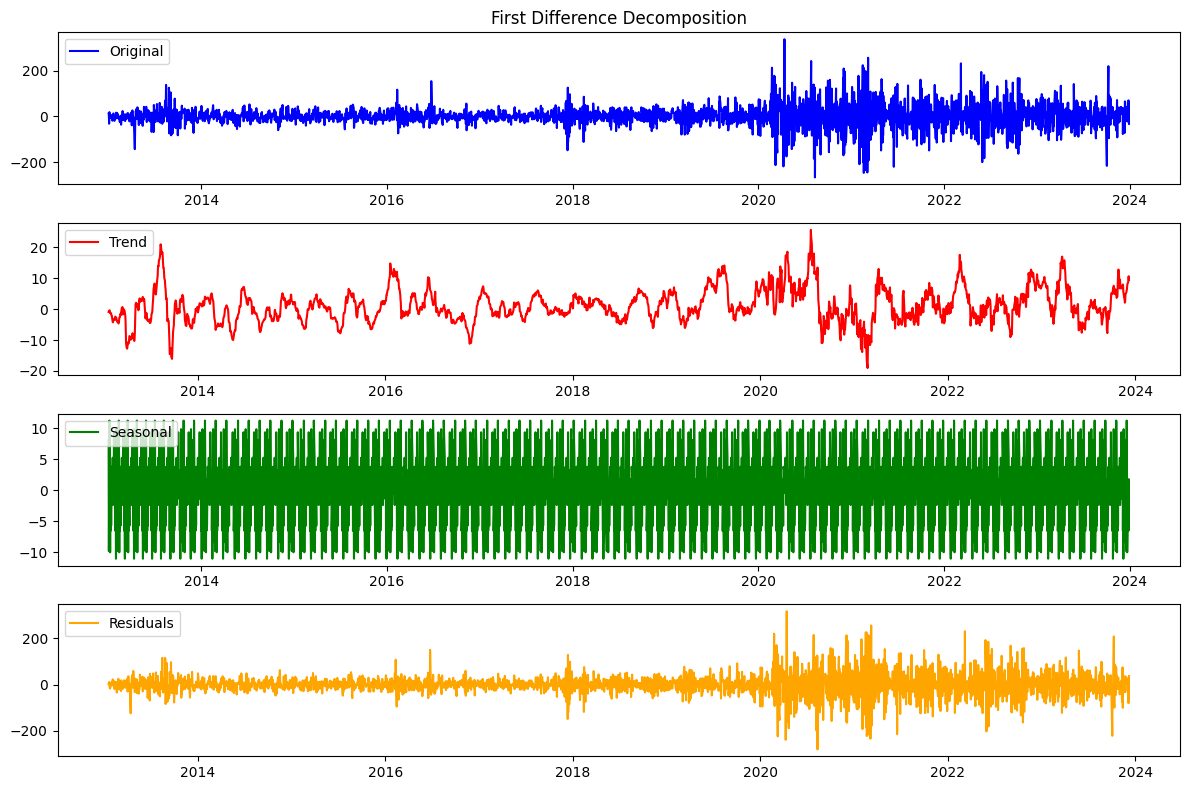

In [40]:
columns_to_decompose = ['First Difference']

# Perform decomposition and plot the components
for column in columns_to_decompose:
    decomposition = seasonal_decompose(df[column].dropna(), model='additive',period=30)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(df[column], label='Original', color='blue')
    plt.title(f'{column} Decomposition')
    plt.legend(loc='upper left')
    
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='upper left')
    
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal', color='green')
    plt.legend(loc='upper left')
    
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='orange')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

In [41]:

pdq = (1, 1, 1)
seasonal_pdq = (1, 1, 1, 12) 

# Fit SARIMA model
model = SARIMAX(df['First Difference'],
                order=pdq,
                seasonal_order=seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print model summary
print(results.summary())

# Forecast
forecast = results.get_forecast(steps=len(df['First Difference']))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()



c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   First Difference   No. Observations:                 2861
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14777.347
Date:                            Tue, 23 Apr 2024   AIC                          29564.695
Time:                                    10:22:20   BIC                          29594.442
Sample:                                         0   HQIC                         29575.426
                                           - 2861                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3078      0.011    -29.288      0.000      -0.328      -0.287
ma.L1         -1.0000      0.566   

c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


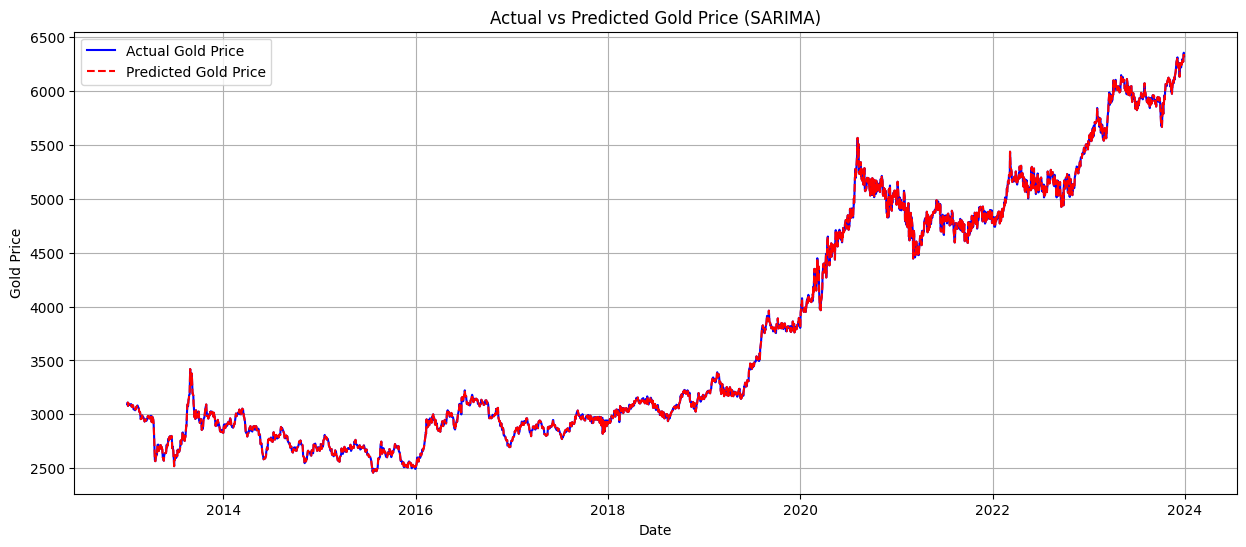

In [42]:
# Reverse differencing to obtain forecasted gold prices
forecast_gold_price = df['Price of gold'].iloc[0] + df['First Difference'].cumsum()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Price of gold'], label='Actual Gold Price', color='blue')
plt.plot(df.index, forecast_gold_price, label='Predicted Gold Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Gold Price (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()


In [43]:

# Remove NaN values from actual and forecasted gold prices
actual_gold_price_clean = df['Price of gold'].dropna()
forecast_gold_price_clean = forecast_gold_price[:len(actual_gold_price_clean)].dropna()

# Ensure the lengths are the same
if len(actual_gold_price_clean) != len(forecast_gold_price_clean):
    min_length = min(len(actual_gold_price_clean), len(forecast_gold_price_clean))
    actual_gold_price_clean = actual_gold_price_clean[:min_length]
    forecast_gold_price_clean = forecast_gold_price_clean[:min_length]

# Calculate R-squared
r_squared = r2_score(actual_gold_price_clean, forecast_gold_price_clean)

# Calculate MSE
mse = mean_squared_error(actual_gold_price_clean, forecast_gold_price_clean)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(actual_gold_price_clean, forecast_gold_price_clean)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


R-squared: 0.9983076817436713
Mean Squared Error (MSE): 2122.935542167832
Root Mean Squared Error (RMSE): 46.075324656130555
Mean Absolute Error (MAE): 29.46984615384615


In [44]:
df=pd.read_excel("Gold_details.xlsx")

Lets try another ML model that is multiple regression.

In [46]:
X = df[[ 'Exchange rate', 'Crude Oil Price(INR)', 'Inflation Rate', 'S&P Index Fund']]
Y = df['Price of gold']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating and fitting the regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting on the testing set
Y_pred = model.predict(X_test)

print("REGRESSION")
# Calculating R-squared score
r_squared = r2_score(Y_test, Y_pred)
print("R-squared:", r_squared)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)


REGRESSION
R-squared: 0.8746020572087109
Mean Squared Error (MSE): 168742.60367781913
Root Mean Squared Error (RMSE): 410.78291551355824
Mean Absolute Error (MAE): 323.9517370649593


The R-squared value of 0.9027 indicates that approximately 90.27% of the variability in the "Price of gold" can be explained by the regression model using the predictors: Exchange rate, Crude Oil Price(INR), Inflation Rate, and S&P Index Fund.

In [47]:
results = pd.DataFrame({'Actual': Y_test.values, 'Predicted': Y_pred})
print(results.head(10))

    Actual    Predicted
0  4982.11  4374.853705
1  2458.24  2733.688007
2  3036.77  3224.045702
3  2789.78  2865.997500
4  5456.20  5454.679482
5  4662.33  4833.982515
6  2781.45  2486.937324
7  2840.92  2917.025013
8  4531.87  4604.291966
9  2568.81  2567.323030


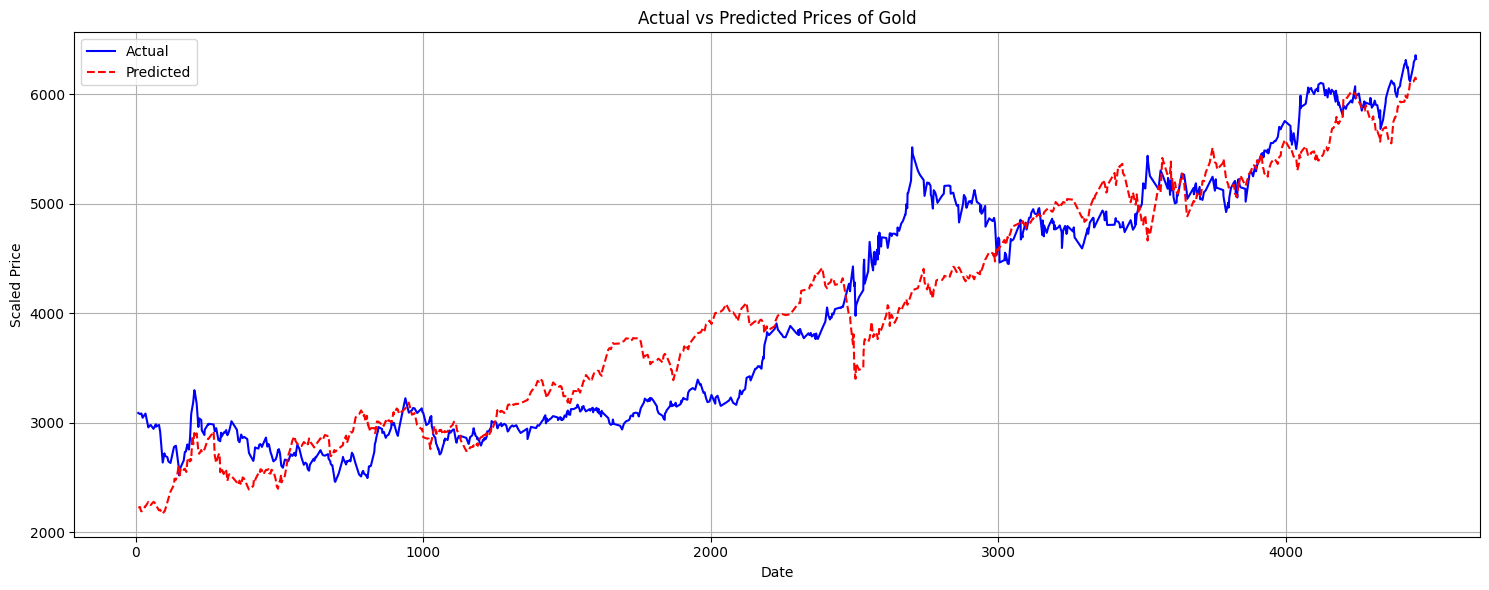

In [48]:

# Assuming X_test.index is a DateTimeIndex and Y_test, Y_pred are arrays or lists

# Create DataFrame with 'Date', 'Actual', and 'Predicted' columns
results = pd.DataFrame({
    'Date': X_test.index,
    'Actual': Y_test.values,
    'Predicted': Y_pred
})

# Set the 'Date' column as the index
results.set_index('Date', inplace=True)

# Sort the DataFrame by index (dates)
results.sort_index(inplace=True)

# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices of Gold')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
lm = smf.ols('Q("Price of gold") ~ Q("Exchange rate") + Q("Crude Oil Price(INR)") + Q("Inflation Rate") + Q("S&P Index Fund")', data=df).fit()

# Print the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("Price of gold")   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     7203.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:31:34   Log-Likelihood:                -33198.
No. Observations:                4455   AIC:                         6.641e+04
Df Residuals:                    4450   BIC:                         6.644e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Exchange rate (50.4457):

A unit increase in the Exchange rate is associated with an increase of approximately 50.45 units in the "Price of gold", holding other predictors constant.
Crude Oil Price(INR) (-0.0036):

The "Crude Oil Price(INR)" is not statistically significant (p-value = 0.549), suggesting it may not have a significant linear relationship with the "Price of gold" in this model.
Inflation Rate (92.1449):

A unit increase in the Inflation Rate is associated with an increase of approximately 92.14 units in the "Price of gold", holding other predictors constant.
S&P Index Fund (0.8452):

A unit increase in the S&P Index Fund is associated with an increase of approximately 0.85 units in the "Price of gold", holding other predictors constant.

The model explains a significant portion of the variability in the "Price of gold" with an R-squared value of 0.879.
Exchange rate, Inflation Rate, and S&P Index Fund are significant predictors of the "Price of gold".

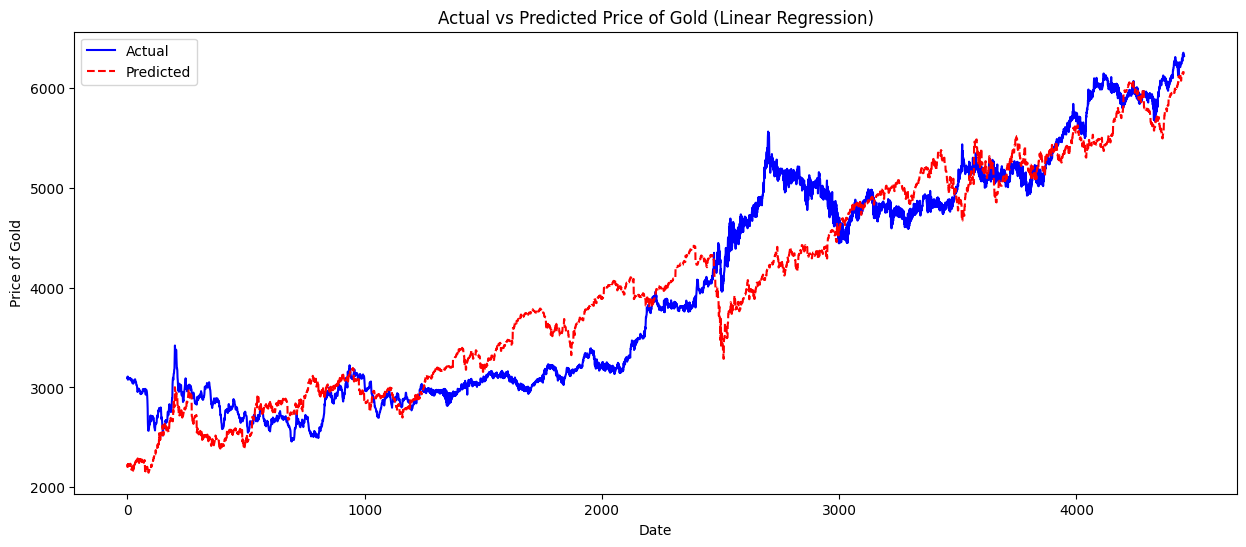

In [50]:
df['Predicted'] = lm.predict(df)

# Create a DataFrame for actual and predicted values
results = pd.DataFrame({
    'Date': df.index,  # Assuming the index is a DateTimeIndex
    'Actual': df['Price of gold'],
    'Predicted': df['Predicted']
})

# Set the 'Date' column as the index
results.set_index('Date', inplace=True)

# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Price of Gold (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price of Gold')
plt.legend()
plt.show()

Now lets try RANDOM FOREST


In [51]:
df=pd.read_excel("Gold_details.xlsx")

In [52]:
df

,Date,Price of gold,Exchange rate,Crude Oil Price(INR),Inflation Rate,S&P Index Fund
0,2013-01-01,3092.79,54.83,5032.88,11.62,1462.420044
1,2013-01-02,3105.15,54.39,5067.51,11.62,1462.420044
2,2013-01-03,3109.68,54.42,5073.36,11.62,1459.369995
3,2013-01-04,3078.01,54.85,5090.53,11.62,1466.469971
4,2013-01-05,3096.79,54.85,5129.82,11.62,1461.890015
...,...,...,...,...,...,...
4450,2023-12-27,6323.05,83.32,6250.18,5.69,4781.580078
4451,2023-12-28,6356.20,83.23,6115.05,5.69,4783.350098
4452,2023-12-28,6316.64,83.23,6115.05,5.69,4783.350098
4453,2023-12-29,6323.79,83.12,6200.34,5.69,4769.830078


In [53]:
df.set_index("Date",inplace=True)

In [54]:
# Define features and target variable
X = df.drop('Price of gold', axis=1)
y = df['Price of gold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [55]:
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("RandomForest")
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared:", r_squared)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

RandomForest
R-squared: 0.997140290755469
Mean Squared Error (MSE): 3848.187401980337
Root Mean Squared Error (RMSE): 62.03376017927929
Mean Absolute Error (MAE): 43.37042565608002


In [56]:
y_test

Date
2020-11-23    4982.11
2015-07-24    2458.24
2018-02-09    3036.77
2017-07-12    2789.78
2022-12-13    5456.20
               ...   
2019-01-11    3200.12
2017-03-20    2854.10
2018-11-30    3025.03
2014-01-01    2829.52
2016-12-20    2710.07
Name: Price of gold, Length: 891, dtype: float64

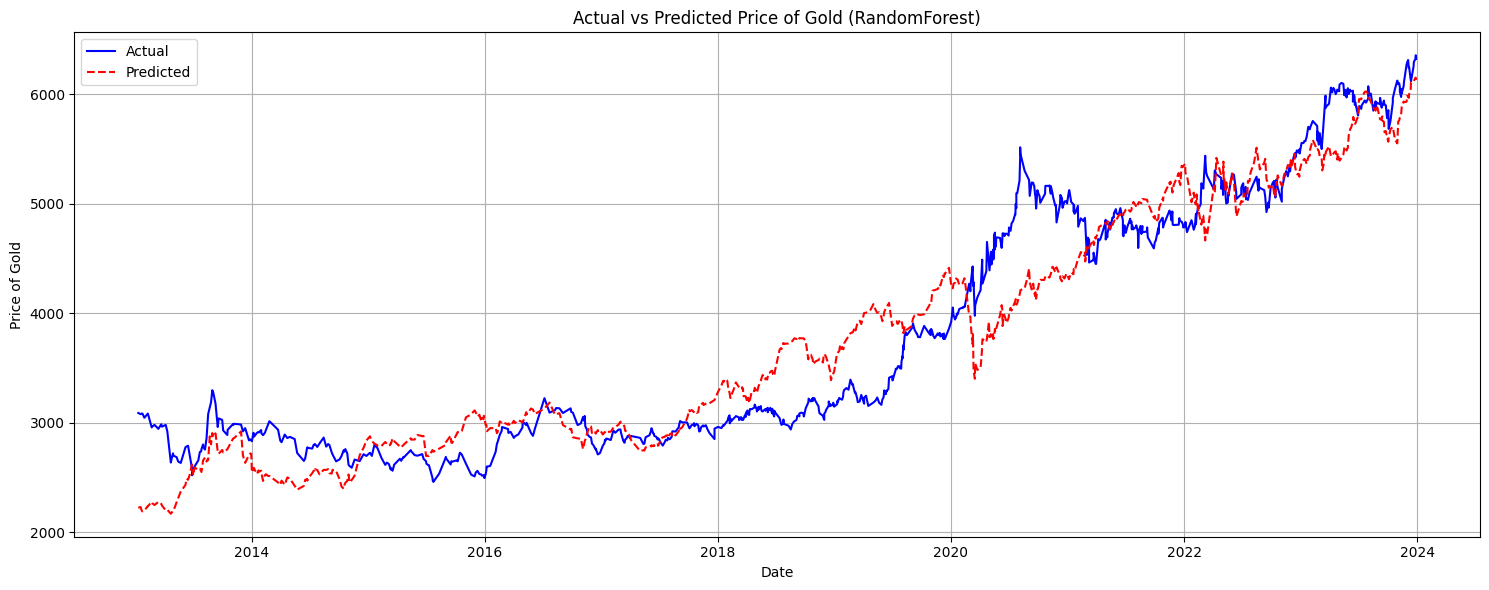

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Find the minimum length among the arrays/lists
min_length = min(len(X_test.index), len(Y_test.values), len(Y_pred))

# Truncate the arrays/lists to the minimum length
X_test_truncated = X_test.index[:min_length]
Y_test_truncated = Y_test.values[:min_length]
Y_pred_truncated = Y_pred[:min_length]

# Create DataFrame
results = pd.DataFrame({
    'Date': X_test_truncated,
    'Actual': Y_test_truncated,
    'Predicted': Y_pred_truncated
})

# Set the 'Date' column as the index and sort by date
df_rfr = results.set_index('Date').sort_index()

# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(df_rfr.index, df_rfr['Actual'], label='Actual', color='blue')
plt.plot(df_rfr.index, df_rfr['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Price of Gold (RandomForest)')
plt.xlabel('Date')
plt.ylabel('Price of Gold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LSTM


In [94]:
df_gold = pd.read_excel("Gold_details.xlsx")

In [95]:
df= df_gold[['Date','Price of gold']]

In [96]:
df.isnull().sum().sum()


0

In [97]:
import plotly.express as px

# Plotting
fig = px.line(df_gold, x='Date', y='Price of gold', line_shape='linear')
fig.update_traces(mode='lines+markers', marker=dict(size=5), line_color='black') 
fig.update_layout(
    xaxis_title="Date", 
    yaxis_title="Scaled Price",
    title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
    plot_bgcolor='White',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray')
)
fig.show()


c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [99]:

fig = px.line(df_gold, x='Date', y='Price of gold')
fig.update_traces(line_color='blue') 
fig.update_layout(
    xaxis_title="Date", 
    yaxis_title="Scaled Price",
    title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray')
)
fig.show()


c:\Users\Adhersh A\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [104]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

514

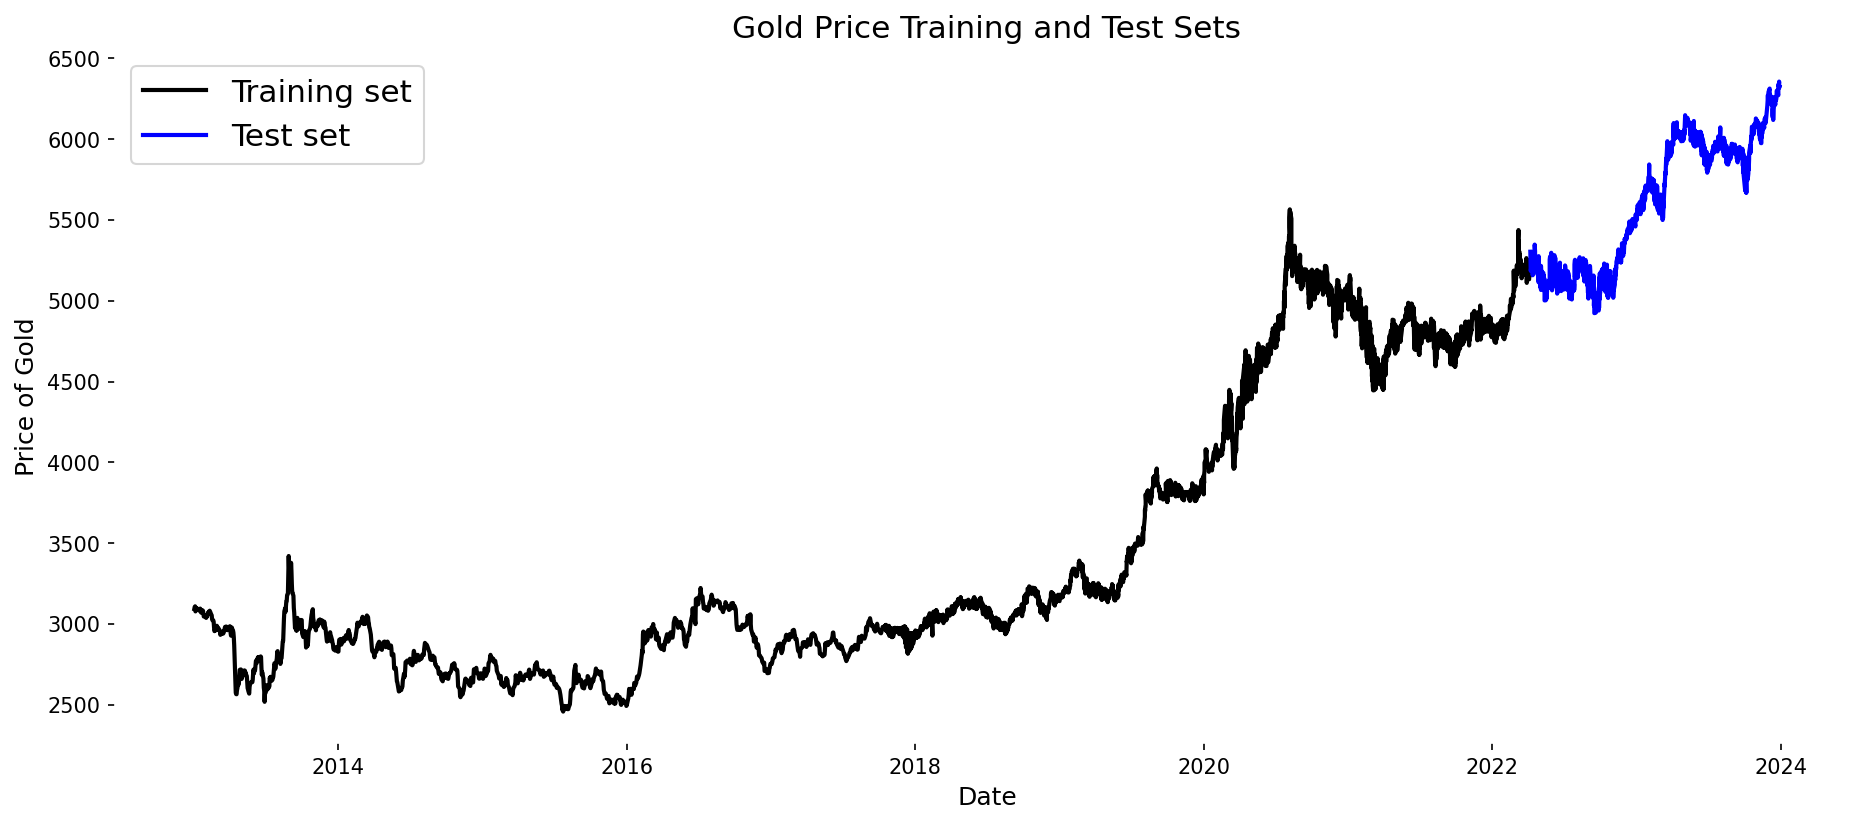

In [105]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'White'
plt.rc('axes', edgecolor='white')

# Assuming df_gold_reset is your DataFrame with 'Date' as a column
test_size = int(len(df) * 0.2)  # Assuming 20% of the data as test set

plt.plot(df.Date[:-test_size], df['Price of gold'][:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df['Price of gold'][-test_size:], color='blue', lw=2)

plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price of Gold', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()


In [106]:
scaler = MinMaxScaler()
scaler.fit(df['Price of gold'].values.reshape(-1,1))

MinMaxScaler()

In [107]:
window_size = 60
train_data = df['Price of gold'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [108]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [109]:
test_data = df['Price of gold'][-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))


In [110]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [111]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (3504, 60, 1)
y_train Shape:  (3504, 1)
X_test Shape:   (891, 60, 1)
y_test Shape:   (891, 1)


In [112]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [113]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0   

In [114]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

28/28 [==============================] - 3s 32ms/step


In [115]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.01388071570545435
Test MAPE: 0.10628380774419753
Test Accuracy: 0.8937161922558025


In [116]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

In [117]:

# Calculate evaluation metrics
r_squared = r2_score(y_test_true, y_test_pred)
mse = mean_squared_error(y_test_true, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_true, y_test_pred)

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared: -0.28495650656112637
Mean Squared Error (MSE): 210904.94353965158
Root Mean Squared Error (RMSE): 459.2438824194086
Mean Absolute Error (MAE): 365.1404165789843


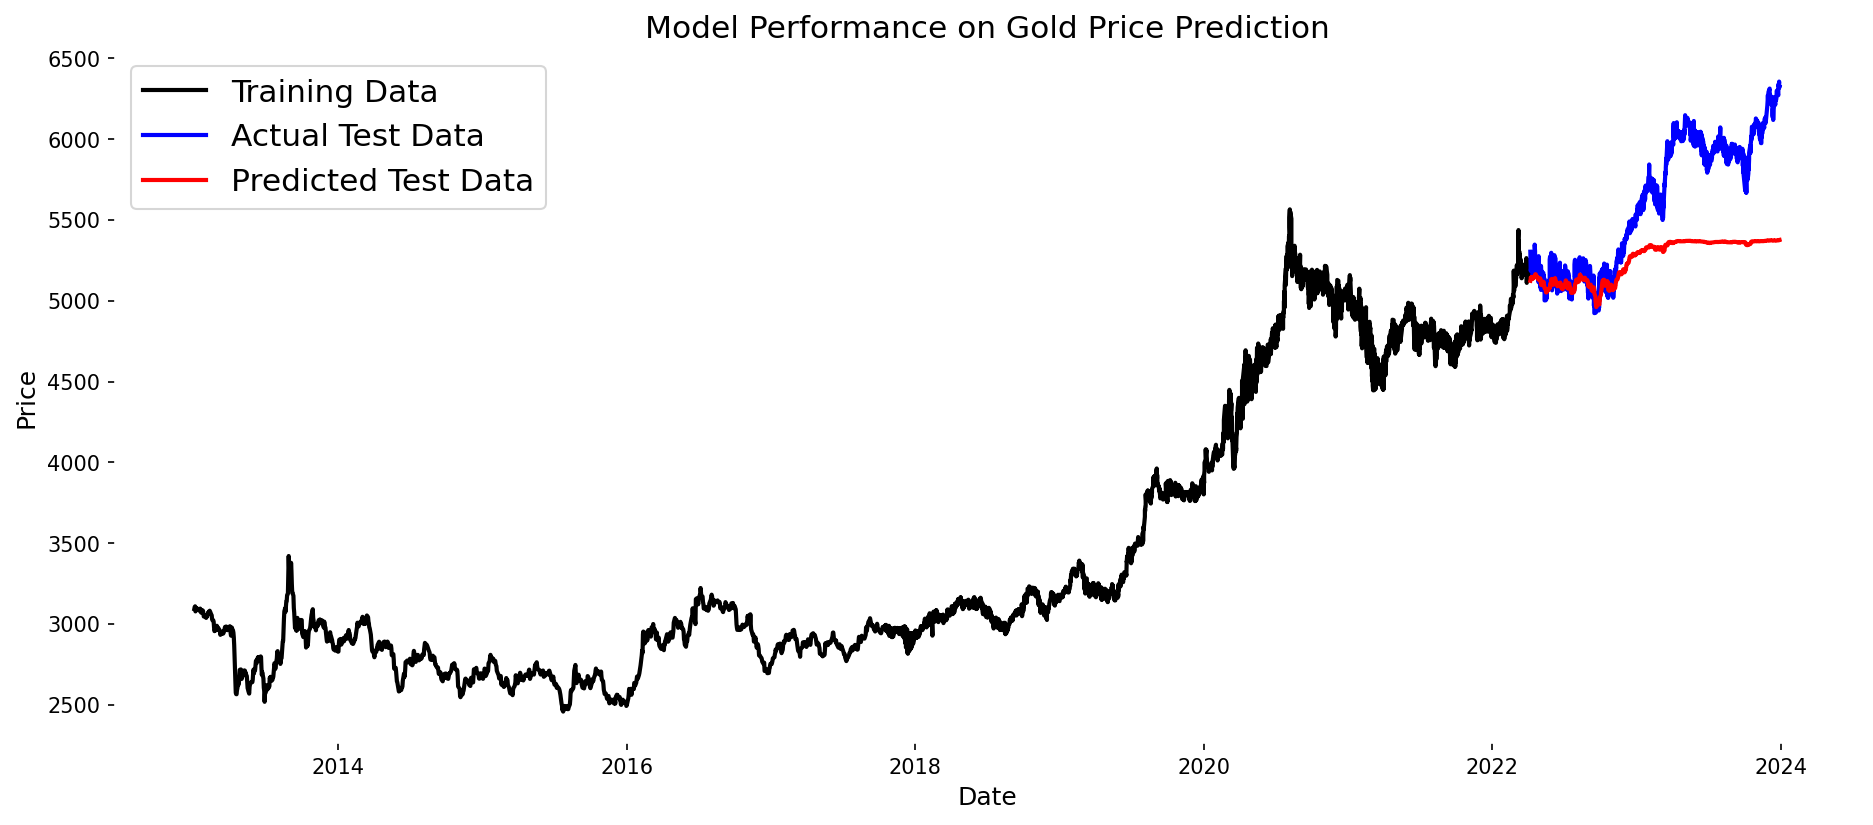

In [118]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()